In [1]:
import yfinance as yf
from datetime import datetime, date
import pandas as pd
import ta

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df_data = pd.read_csv('data/df_data_daily_variation.csv')

# Ver las primeras filas
df_data.head()

,Fecha,Variacion_Porcentual EURUSD,Variacion_Porcentual_Dia_Anterior EURUSD,Variacion_Porcentual USDJPY,Variacion_Porcentual_Dia_Anterior USDJPY,Variacion_Porcentual GBP/USD,Variacion_Porcentual_Dia_Anterior GBP/USD,Variacion_Porcentual USD/CHF,Variacion_Porcentual_Dia_Anterior USD/CHF,Variacion_Porcentual AUD/USD,...,Variacion_Porcentual Gas Natural,Variacion_Porcentual_Dia_Anterior Gas Natural,Variacion_Porcentual Apple,Variacion_Porcentual_Dia_Anterior Apple,Variacion_Porcentual Microsoft,Variacion_Porcentual_Dia_Anterior Microsoft,Variacion_Porcentual Amazon,Variacion_Porcentual_Dia_Anterior Amazon,Variacion_Porcentual Alphabet,Variacion_Porcentual_Dia_Anterior Alphabet
0,2015-01-01,0.000000,-0.076165,0.000000,0.164620,0.000000,-0.007796,0.000000,-0.001007,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2015-01-02,-0.076165,-1.182694,0.164620,0.470506,-0.007796,-1.892271,-0.001007,1.176947,0.081778,...,0.000000,-4.029306,0.000000,-2.817151,0.000000,-0.919553,0.000000,-2.051729,0.000000,-1.905400
2,2015-01-05,-1.182694,-0.062087,0.470506,-0.837799,-1.892271,-0.173944,1.176947,0.039764,-1.347322,...,-4.029306,1.943095,-2.817151,0.009398,-0.919553,-1.467745,-2.051729,-2.283333,-1.905400,-2.467944
3,2015-01-06,-0.062087,-0.533201,-0.837799,-0.629689,-0.173944,-0.788688,0.039764,0.506859,0.396898,...,1.943095,-2.280460,0.009398,1.402207,-1.467745,1.270550,-2.283333,1.059974,-2.467944,-0.294090
4,2015-01-07,-0.533201,-0.331407,-0.629689,0.519078,-0.788688,-0.200927,0.506859,0.340158,-0.242406,...,-2.280460,1.950540,1.402207,3.842272,1.270550,2.941782,1.059974,0.683602,-0.294090,0.348405


In [5]:
print(list(df_data.columns))

['Fecha', 'Variacion_Porcentual EURUSD', 'Variacion_Porcentual_Dia_Anterior EURUSD', 'Variacion_Porcentual USDJPY', 'Variacion_Porcentual_Dia_Anterior USDJPY', 'Variacion_Porcentual GBP/USD', 'Variacion_Porcentual_Dia_Anterior GBP/USD', 'Variacion_Porcentual USD/CHF', 'Variacion_Porcentual_Dia_Anterior USD/CHF', 'Variacion_Porcentual AUD/USD', 'Variacion_Porcentual_Dia_Anterior AUD/USD', 'Variacion_Porcentual USD/CAD', 'Variacion_Porcentual_Dia_Anterior USD/CAD', 'Variacion_Porcentual S&P 500', 'Variacion_Porcentual_Dia_Anterior S&P 500', 'Variacion_Porcentual Nasdaq 100', 'Variacion_Porcentual_Dia_Anterior Nasdaq 100', 'Variacion_Porcentual Dow Jones', 'Variacion_Porcentual_Dia_Anterior Dow Jones', 'Variacion_Porcentual DAX 40', 'Variacion_Porcentual_Dia_Anterior DAX 40', 'Variacion_Porcentual FTSE 100', 'Variacion_Porcentual_Dia_Anterior FTSE 100', 'Variacion_Porcentual Nikkei 225', 'Variacion_Porcentual_Dia_Anterior Nikkei 225', 'Variacion_Porcentual Euro Stoxx 50', 'Variacion_Porce

# Correlaciones

## EUR/USD

### Correlaciones Lineal

In [6]:
#Seleccionar el dataframe

# Supongamos que quieres las columnas 'columna1', 'columna2' y 'columna3'
df_eur_usd = df_data[['Fecha', 'Variacion_Porcentual_Dia_Anterior EURUSD',  'Variacion_Porcentual USDJPY',  'Variacion_Porcentual GBP/USD',  'Variacion_Porcentual USD/CHF'
,  'Variacion_Porcentual AUD/USD',  'Variacion_Porcentual USD/CAD',  'Variacion_Porcentual S&P 500',  'Variacion_Porcentual Nasdaq 100',  'Variacion_Porcentual Dow Jones'
, 'Variacion_Porcentual DAX 40',  'Variacion_Porcentual FTSE 100',  'Variacion_Porcentual Nikkei 225',  'Variacion_Porcentual Euro Stoxx 50',  'Variacion_Porcentual Hang Seng'
,  'Variacion_Porcentual Petróleo WTI',  'Variacion_Porcentual Petróleo Brent',  'Variacion_Porcentual Oro',  'Variacion_Porcentual Plata',  'Variacion_Porcentual Cobre'
,  'Variacion_Porcentual Gas Natural',  'Variacion_Porcentual Apple',  'Variacion_Porcentual Microsoft',  'Variacion_Porcentual Amazon',  'Variacion_Porcentual Alphabet']]

# Mostrar el DataFrame resultante

df_eur_usd_sin_fecha = df_data[['Variacion_Porcentual_Dia_Anterior EURUSD',  'Variacion_Porcentual USDJPY',  'Variacion_Porcentual GBP/USD',  'Variacion_Porcentual USD/CHF'
,  'Variacion_Porcentual AUD/USD',  'Variacion_Porcentual USD/CAD',  'Variacion_Porcentual S&P 500',  'Variacion_Porcentual Nasdaq 100',  'Variacion_Porcentual Dow Jones'
, 'Variacion_Porcentual DAX 40',  'Variacion_Porcentual FTSE 100',  'Variacion_Porcentual Nikkei 225',  'Variacion_Porcentual Euro Stoxx 50',  'Variacion_Porcentual Hang Seng'
,  'Variacion_Porcentual Petróleo WTI',  'Variacion_Porcentual Petróleo Brent',  'Variacion_Porcentual Oro',  'Variacion_Porcentual Plata',  'Variacion_Porcentual Cobre'
,  'Variacion_Porcentual Gas Natural',  'Variacion_Porcentual Apple',  'Variacion_Porcentual Microsoft',  'Variacion_Porcentual Amazon',  'Variacion_Porcentual Alphabet']]

df_eur_usd_sin_fecha

,Variacion_Porcentual_Dia_Anterior EURUSD,Variacion_Porcentual USDJPY,Variacion_Porcentual GBP/USD,Variacion_Porcentual USD/CHF,Variacion_Porcentual AUD/USD,Variacion_Porcentual USD/CAD,Variacion_Porcentual S&P 500,Variacion_Porcentual Nasdaq 100,Variacion_Porcentual Dow Jones,Variacion_Porcentual DAX 40,...,Variacion_Porcentual Petróleo WTI,Variacion_Porcentual Petróleo Brent,Variacion_Porcentual Oro,Variacion_Porcentual Plata,Variacion_Porcentual Cobre,Variacion_Porcentual Gas Natural,Variacion_Porcentual Apple,Variacion_Porcentual Microsoft,Variacion_Porcentual Amazon,Variacion_Porcentual Alphabet
0,-0.076165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-1.182694,0.164620,-0.007796,-0.001007,0.081778,-0.005173,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.062087,0.470506,-1.892271,1.176947,-1.347322,1.541243,-1.827811,-1.637739,-1.858016,-2.985954,...,-5.029413,-5.866710,1.509277,2.828274,-1.602961,-4.029306,-2.817151,-0.919553,-2.051729,-1.905400
3,-0.533201,-0.837799,-0.173944,0.039764,0.396898,-0.305266,-0.889347,-1.204767,-0.742843,-0.036946,...,-4.216628,-3.784602,1.279178,2.620680,0.393839,1.943095,0.009398,-1.467745,-2.283333,-2.467944
4,-0.331407,-0.629689,-0.788688,0.506859,-0.242406,0.680447,1.162984,1.196107,1.225439,0.512368,...,1.502193,0.097853,-0.713530,-0.560142,-0.285303,-2.280460,1.402207,1.270550,1.059974,-0.294090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2717,-0.602247,-0.947750,0.664281,-0.769815,0.856482,-0.112920,0.580029,0.794864,0.506223,0.672565,...,1.423543,1.547269,-0.605238,-0.173600,-0.517109,0.757983,0.778387,0.216464,-0.454869,-1.686095
2718,0.330095,0.972264,-0.186736,0.851774,-0.497243,0.031361,0.007369,0.273928,-0.216141,0.767326,...,-0.883144,-1.173239,0.695482,0.046380,1.143566,-0.161198,-0.221379,0.194396,0.738899,1.125292
2719,0.278328,-0.768238,0.153141,-0.597894,0.380355,-0.261756,-0.527738,-0.803291,-0.254550,0.194013,...,0.827367,0.740049,-0.675857,3.389432,1.007293,-1.049517,-1.079776,0.821350,0.328142,0.095212
2720,0.000000,0.567506,0.202333,0.156486,0.305348,-0.090650,1.028068,0.994826,1.047107,-0.078603,...,1.909425,1.729423,-0.835646,0.941473,-1.699398,2.909978,1.639831,0.577320,2.722333,3.251879


In [7]:
print(list(df_eur_usd_sin_fecha.columns))

['Variacion_Porcentual_Dia_Anterior EURUSD', 'Variacion_Porcentual USDJPY', 'Variacion_Porcentual GBP/USD', 'Variacion_Porcentual USD/CHF', 'Variacion_Porcentual AUD/USD', 'Variacion_Porcentual USD/CAD', 'Variacion_Porcentual S&P 500', 'Variacion_Porcentual Nasdaq 100', 'Variacion_Porcentual Dow Jones', 'Variacion_Porcentual DAX 40', 'Variacion_Porcentual FTSE 100', 'Variacion_Porcentual Nikkei 225', 'Variacion_Porcentual Euro Stoxx 50', 'Variacion_Porcentual Hang Seng', 'Variacion_Porcentual Petróleo WTI', 'Variacion_Porcentual Petróleo Brent', 'Variacion_Porcentual Oro', 'Variacion_Porcentual Plata', 'Variacion_Porcentual Cobre', 'Variacion_Porcentual Gas Natural', 'Variacion_Porcentual Apple', 'Variacion_Porcentual Microsoft', 'Variacion_Porcentual Amazon', 'Variacion_Porcentual Alphabet']


In [8]:
# Calcula la correlación de todas las variables con 'Variacion_Porcentual_Dia_Anterior_EURUSD'
correlaciones_eurusd = df_eur_usd_sin_fecha.corr()['Variacion_Porcentual_Dia_Anterior EURUSD']

# Ordena los valores para ver las correlaciones más fuertes (positivas y negativas)
correlaciones_eurusd_sorted = correlaciones_eurusd.sort_values(ascending=False)

print("Correlaciones con EUR/USD:")
print(correlaciones_eurusd_sorted)

Correlaciones con EUR/USD:
Variacion_Porcentual_Dia_Anterior EURUSD    1.000000
Variacion_Porcentual Oro                    0.298981
Variacion_Porcentual Plata                  0.260145
Variacion_Porcentual Cobre                  0.223092
Variacion_Porcentual S&P 500                0.078855
Variacion_Porcentual Hang Seng              0.071775
Variacion_Porcentual Dow Jones              0.065051
Variacion_Porcentual Nasdaq 100             0.064252
Variacion_Porcentual Amazon                 0.040253
Variacion_Porcentual Alphabet               0.038862
Variacion_Porcentual Apple                  0.037681
Variacion_Porcentual Microsoft              0.036784
Variacion_Porcentual AUD/USD                0.027152
Variacion_Porcentual Petróleo Brent         0.022048
Variacion_Porcentual Gas Natural            0.017776
Variacion_Porcentual FTSE 100               0.010667
Variacion_Porcentual Nikkei 225             0.010460
Variacion_Porcentual GBP/USD                0.010134
Variacion_Porcentua

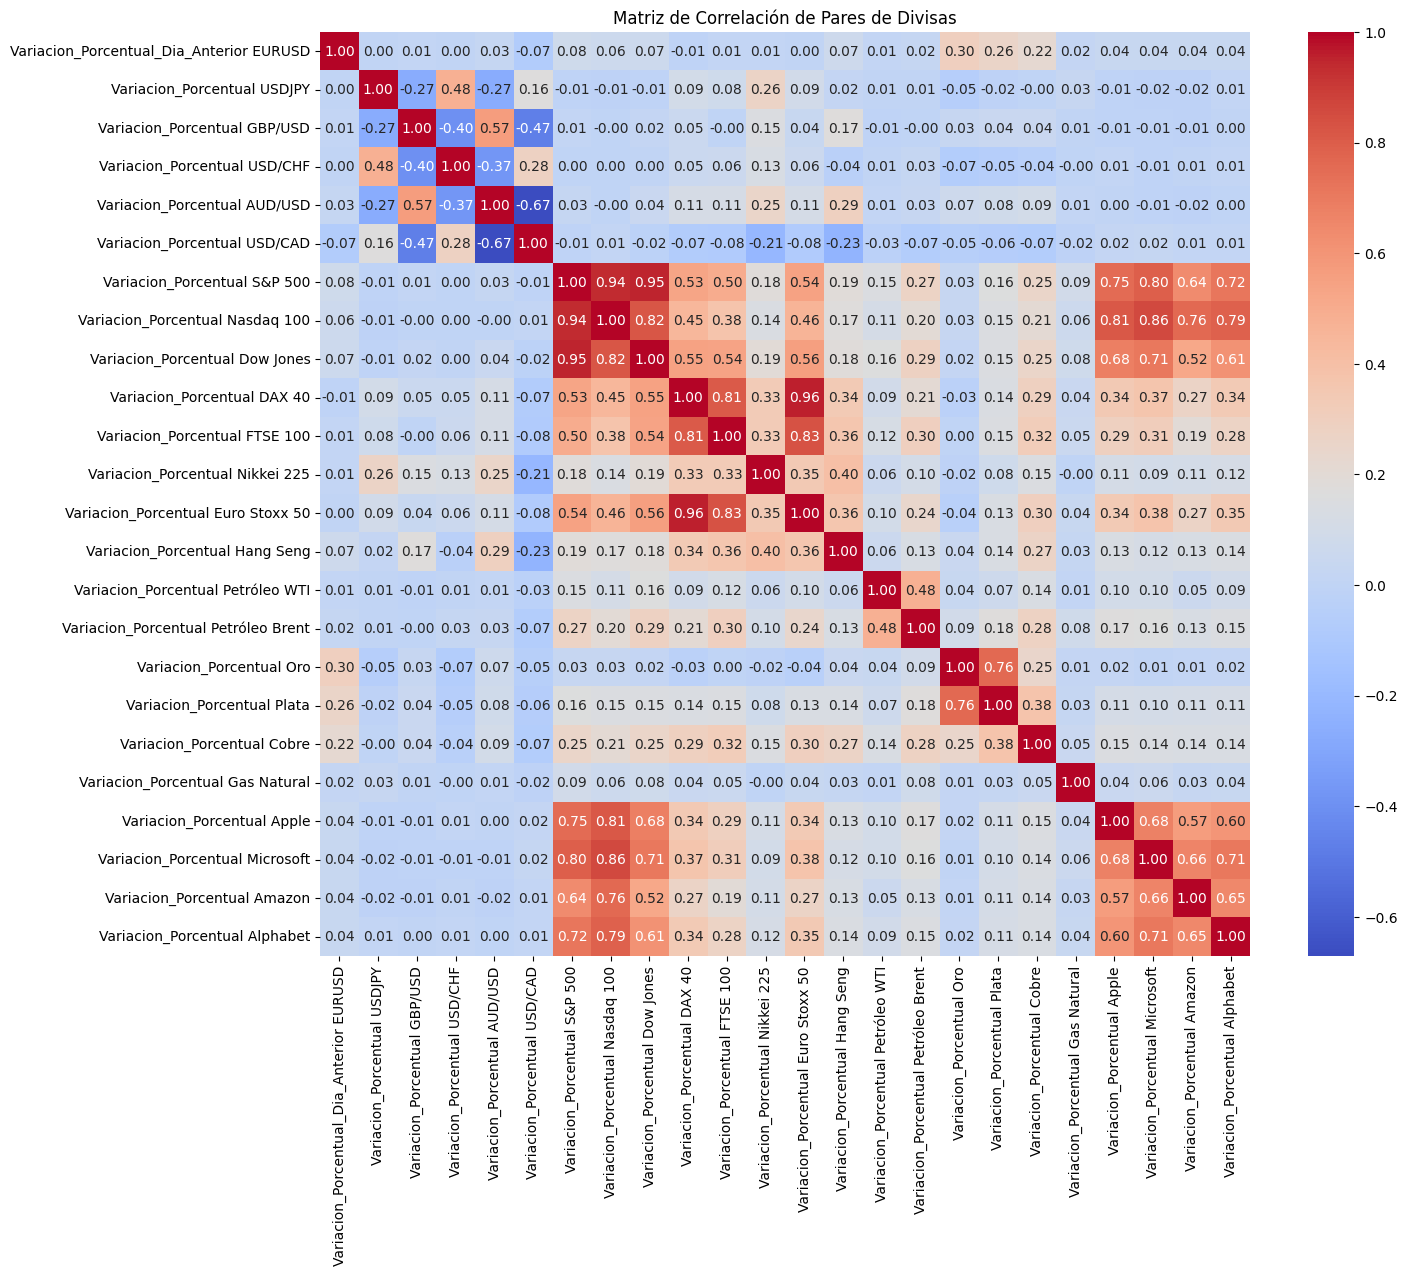

In [9]:
plt.figure(figsize=(15, 12))
sns.heatmap(df_eur_usd_sin_fecha.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Pares de Divisas')
plt.show()

### Correlación Dicotómica

In [10]:
df_dicotomico = (df_eur_usd_sin_fecha > 0).astype(int)
df_dicotomico.head()

,Variacion_Porcentual_Dia_Anterior EURUSD,Variacion_Porcentual USDJPY,Variacion_Porcentual GBP/USD,Variacion_Porcentual USD/CHF,Variacion_Porcentual AUD/USD,Variacion_Porcentual USD/CAD,Variacion_Porcentual S&P 500,Variacion_Porcentual Nasdaq 100,Variacion_Porcentual Dow Jones,Variacion_Porcentual DAX 40,...,Variacion_Porcentual Petróleo WTI,Variacion_Porcentual Petróleo Brent,Variacion_Porcentual Oro,Variacion_Porcentual Plata,Variacion_Porcentual Cobre,Variacion_Porcentual Gas Natural,Variacion_Porcentual Apple,Variacion_Porcentual Microsoft,Variacion_Porcentual Amazon,Variacion_Porcentual Alphabet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,1,1,1,1,1,0,0,0
4,0,0,0,1,0,1,1,1,1,1,...,1,1,0,0,0,0,1,1,1,0


In [11]:
correlation_matrix = df_dicotomico.corr(method='pearson')
print(correlation_matrix)

                                          Variacion_Porcentual_Dia_Anterior EURUSD  \
Variacion_Porcentual_Dia_Anterior EURUSD                                  1.000000   
Variacion_Porcentual USDJPY                                               0.003458   
Variacion_Porcentual GBP/USD                                              0.010732   
Variacion_Porcentual USD/CHF                                             -0.006200   
Variacion_Porcentual AUD/USD                                             -0.014038   
Variacion_Porcentual USD/CAD                                              0.001433   
Variacion_Porcentual S&P 500                                              0.061248   
Variacion_Porcentual Nasdaq 100                                           0.038710   
Variacion_Porcentual Dow Jones                                            0.072342   
Variacion_Porcentual DAX 40                                              -0.036521   
Variacion_Porcentual FTSE 100                         

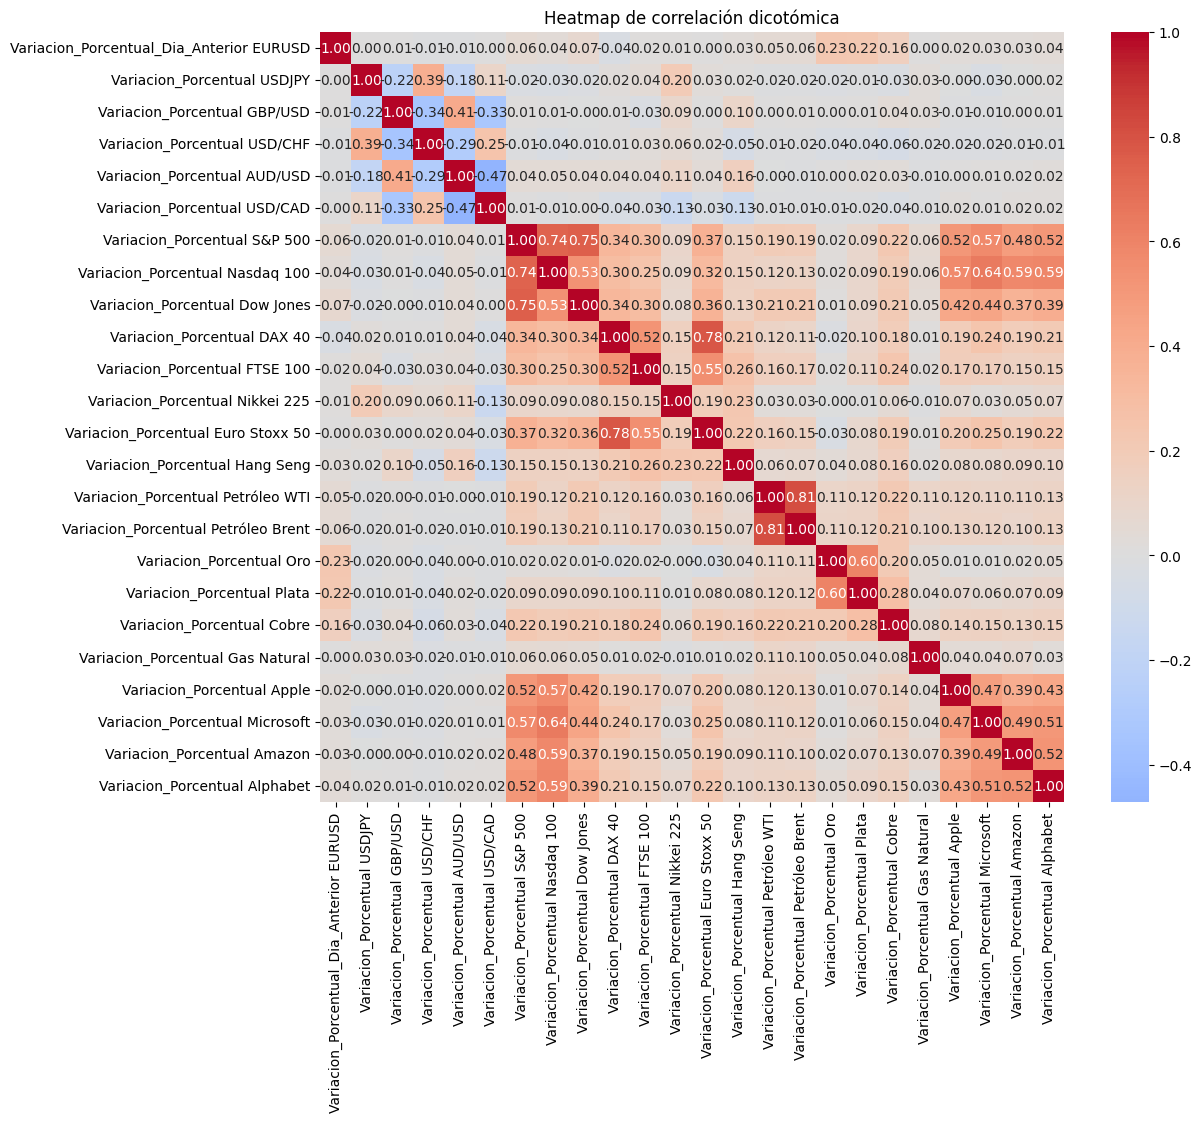

In [13]:
plt.figure(figsize=(12, 10))  # ajusta el tamaño según el número de variables
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

plt.title('Heatmap de correlación dicotómica')
plt.show()